In [64]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xlrd

In [65]:
df=pd.read_csv('All_States_GE.csv')

/tmp/ipykernel_52417/2516659278.py:1: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('All_States_GE.csv')


In [66]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [67]:
#preprocessing
df.drop(['Sub_Region'],axis=1)#dropping sub_region column because it is empty


,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,S.P.N.S.GAWDA,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,N.DEO,M,...,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,R.S.NIM,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,R.SINGH,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)


In [68]:

print(df['Candidate_Type'])

0        GEN
1        NaN
2        NaN
3        GEN
4        NaN
        ... 
91664    NaN
91665    NaN
91666    NaN
91667    NaN
91668    NaN
Name: Candidate_Type, Length: 91669, dtype: object


In [69]:
df['Candidate_Type'].unique()
df['Party'].unique()
df['Year'].unique()

array([2019, 2020, 2021, 2014, 2015, 2016, 2017, 2018, 2009, 2011, 2012,
       2013, 2004, 2005, 2006, 2007, 2008, 1999, 2000, 2001, 2002, 2003,
       1998, 1996, 1997, 1991, 1992, 1993, 1994, 1995, 1989, 1984, 1985,
       1986, 1987, 1988, 1980, 1981, 1982, 1977, 1978, 1979, 1971, 1972,
       1967, 1968, 1969, 1970, 1962, 1963, 1964, 1965])

In [81]:
#filtering data only for 2004 to 2
years_to_remove=[1999,1998, 1996, 1997, 1991, 1992, 1993, 1994, 1995, 1989, 1984, 1985,
       1986, 1987, 1988, 1980, 1981, 1982, 1977, 1978, 1979, 1971, 1972,
           1967, 1968, 1969, 1970, 1962, 1963, 1964, 1965,2020, 2021, 2014, 2015, 2016, 2017, 2018, 2011, 2012,
       2013, 2005, 2006, 2007, 2008, 1999, 2000, 2001, 2002, 2003]
df1=df[~df['Year'].isin(years_to_remove)]


In [82]:
df1['Year'].unique()

array([2019, 2009, 2004])

In [83]:
# insight1 no. of female and male candidates for years 
gender_insight = df1.groupby(['Year', 'Sex']).size().reset_index(name='count')

In [84]:
pivot_data = gender_insight.pivot(index='Year', columns='Sex', values='count')

<Figure size 7200x7200 with 0 Axes>

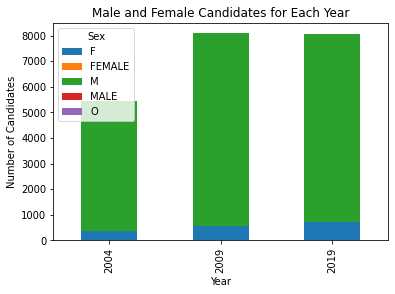

In [94]:
plt.figure(figsize=(100,100))
pivot_data.plot(kind='bar', stacked=True)

# Add labels and title

plt.xlabel('Year')
plt.ylabel('Number of Candidates')
plt.title('Male and Female Candidates for Each Year')


# Show the plot
plt.show()